##**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')  

##**Data Importing**

In [ ]:
data = pd.read_csv("/content/Final Thetazero Dataset.csv") 

In [ ]:
data.dtypes 

Date                 object
Branch               object
Route                object
Stores               object
FoodItem             object
QuantityDelivered     int64
dtype: object

In [ ]:
data.head()

,Date,Branch,Route,Stores,FoodItem,QuantityDelivered
0,2023-04-11,branch1,route1,store1,WhiteBread,18
1,2023-04-11,branch1,route1,store1,WheatBread,25
2,2023-04-11,branch1,route1,store1,SweetBun,25
3,2023-04-11,branch1,route1,store1,Croissant,17
4,2023-04-11,branch1,route1,store2,WhiteBread,22


In [ ]:
data.shape

(600, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               600 non-null    object
 1   Branch             600 non-null    object
 2   Route              600 non-null    object
 3   Stores             600 non-null    object
 4   FoodItem           600 non-null    object
 5   QuantityDelivered  600 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 28.2+ KB


In [ ]:
data.describe()

,QuantityDelivered
count,600.000000
mean,12.740000
std,6.998621
min,1.000000
25%,7.000000
50%,13.000000
75%,18.000000
max,25.000000


#**Feature Engineering**

##**Splitting Date into Year,Month,Day**

In [ ]:
parts = data["Date"].str.split("-", n = 3, expand = True)
data["year"]= parts[0].astype('int')
data["month"]= parts[1].astype('int')
data["day"]= parts[2].astype('int')
data.head() 

,Date,Branch,Route,Stores,FoodItem,QuantityDelivered,year,month,day
0,2023-04-11,branch1,route1,store1,WhiteBread,18,2023,4,11
1,2023-04-11,branch1,route1,store1,WheatBread,25,2023,4,11
2,2023-04-11,branch1,route1,store1,SweetBun,25,2023,4,11
3,2023-04-11,branch1,route1,store1,Croissant,17,2023,4,11
4,2023-04-11,branch1,route1,store2,WhiteBread,22,2023,4,11


**Whether it is a weekend or a weekday must have some effect on the requirements to fulfill the demands.**

####**Weekday**

In [ ]:
from datetime import datetime
import calendar
      
def weekend_or_weekday(year,month,day):
      
    d = datetime(year,month,day) 
    if d.weekday()>4:
        return 1
    else:
        return 0
  
data['weekend'] = data.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1) 
data.head() 

,Date,Branch,Route,Stores,FoodItem,QuantityDelivered,year,month,day,weekend
0,2023-04-11,branch1,route1,store1,WhiteBread,18,2023,4,11,0
1,2023-04-11,branch1,route1,store1,WheatBread,25,2023,4,11,0
2,2023-04-11,branch1,route1,store1,SweetBun,25,2023,4,11,0
3,2023-04-11,branch1,route1,store1,Croissant,17,2023,4,11,0
4,2023-04-11,branch1,route1,store2,WhiteBread,22,2023,4,11,0


**It would be nice to have a column which can indicate whether there was any holiday on a particular day or not.**

####**Holiday**

In [ ]:
from datetime import date
import holidays
  
def is_holiday(x):
    
  india_holidays = holidays.country_holidays('IN')
  
  if india_holidays.get(x):
    return 1
  else:
    return 0
  
data['holidays'] = data['Date'].apply(is_holiday)
data.head()  

,Date,Branch,Route,Stores,FoodItem,QuantityDelivered,year,month,day,weekend,holidays
0,2023-04-11,branch1,route1,store1,WhiteBread,18,2023,4,11,0,0
1,2023-04-11,branch1,route1,store1,WheatBread,25,2023,4,11,0,0
2,2023-04-11,branch1,route1,store1,SweetBun,25,2023,4,11,0,0
3,2023-04-11,branch1,route1,store1,Croissant,17,2023,4,11,0,0
4,2023-04-11,branch1,route1,store2,WhiteBread,22,2023,4,11,0,0


**Droping the Date column**

In [ ]:
data.drop('Date', axis=1, inplace=True) 

In [ ]:
data.columns 

Index(['Branch', 'Route', 'Stores', 'FoodItem', 'QuantityDelivered', 'year',
       'month', 'day', 'weekend', 'holidays'],
      dtype='object')

##**Exploratory Data Analysis**

 **It is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.**

**We have added some features to our dataset using some assumptions. Now let’s check what are the relations between different features with the target feature.**

In [ ]:
data['Stores'].nunique(), data['FoodItem'].nunique()

(15, 4)

From here we can conclude that there are 15 unique stores and they sell 4 different products.

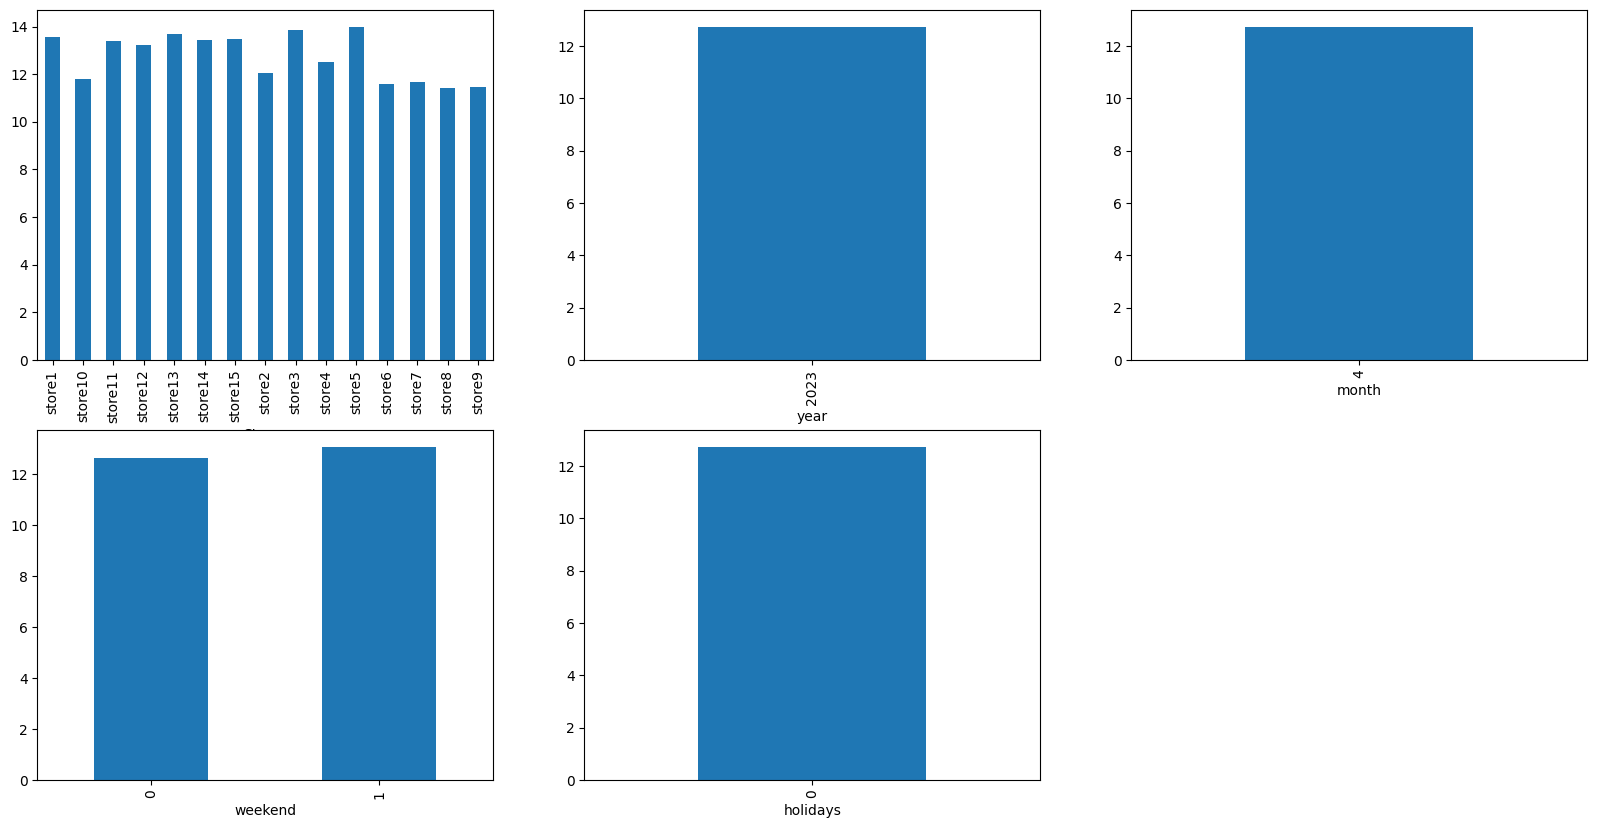

In [ ]:
features = ['Stores', 'year', 'month',\
             'weekend', 'holidays'] 
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    data.groupby(col).mean()['QuantityDelivered'].plot.bar()
plt.show()  

In [ ]:
data.dtypes 

Branch               object
Route                object
Stores               object
FoodItem             object
QuantityDelivered     int64
year                  int64
month                 int64
day                   int64
weekend               int64
holidays              int64
dtype: object

###**Preprocessing**

In [ ]:
features = data.drop(['QuantityDelivered'], axis=1)
target = data['QuantityDelivered'].values
  
  
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.05,
                                                  random_state=22)
X_train.shape, X_val.shape  

((570, 9), (30, 9))

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
le.fit(Y_train) 

Y_train = le.transform(Y_train) 
Y_val = le.transform(Y_val) 

In [ ]:
pd.value_counts(Y_train)

14    43
11    30
1     29
13    28
23    28
9     27
17    26
7     26
15    24
2     24
3     23
5     23
18    22
8     22
6     21
21    21
12    20
0     20
10    19
24    19
19    17
16    15
20    15
22    15
4     13
dtype: int64

In [ ]:
cat_attr = X_train.select_dtypes(include=['object']).columns 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first') 
enc.fit(X_train[cat_attr])
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_val_ohe=enc.transform(X_val[cat_attr]).toarray() 

In [ ]:
print(X_train_ohe.shape)  
print(X_val_ohe.shape)  

(570, 21)
(30, 21)


In [ ]:
num_attr = X_train.select_dtypes(include=['int64']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_attr])
X_train_std = scaler.transform(X_train[num_attr])
X_val_std = scaler.transform(X_val[num_attr]) 

In [ ]:
print(X_train_std.shape) 
print(X_val_std.shape) 

(570, 5)
(30, 5)


**Concatenate attribute Standardised numeric attributes and One hot encoded categorical attributes**

In [ ]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_val_con = np.concatenate([X_val_std, X_val_ohe], axis=1) 

In [ ]:
print(X_train_con.shape) 
print(X_val_con.shape) 

(570, 26)
(30, 26)


##**Model Training**

In [ ]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()] 
  
for i in range(4):
    models[i].fit(X_train_con, Y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train_con)
    print('Training Error : ', mae(Y_train, train_preds)) 
  
    val_preds = models[i].predict(X_val_con)
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print() 

LinearRegression() : 
Training Error :  5.832956902961381
Validation Error :  5.671949542778491

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  1.3008952469025787
Validation Error :  6.851873581608136

Lasso() : 
Training Error :  5.947343798091721
Validation Error :  5.61660818713450

##**let’s difference the series and see how the autocorrelation plot looks like.**

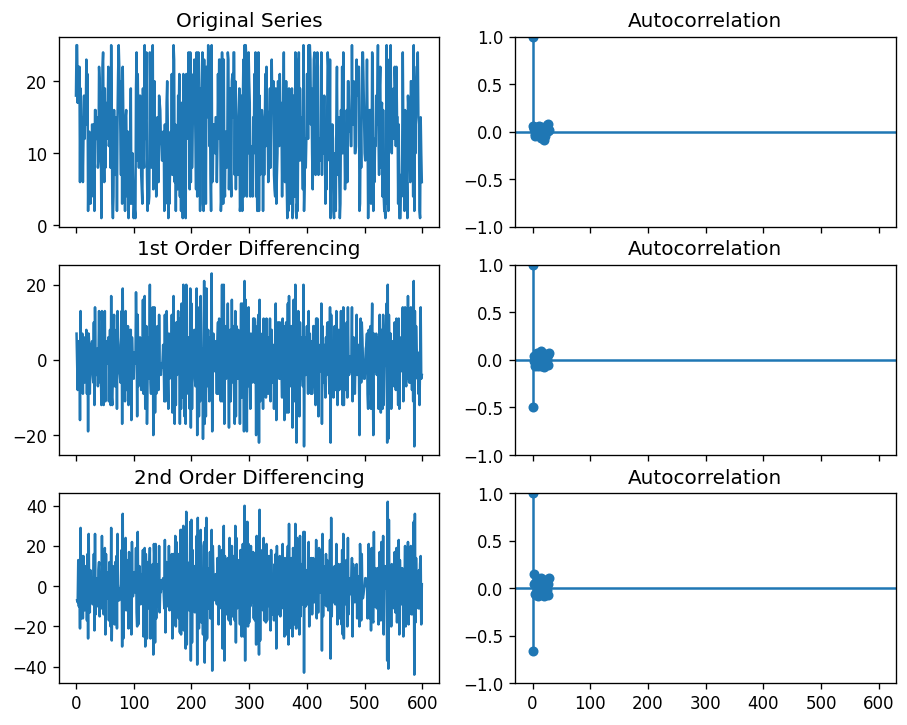

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series 
fig, axes = plt.subplots(3, 2, sharex=True) 
axes[0, 0].plot(data.QuantityDelivered); axes[0, 0].set_title('Original Series') 
plot_acf(data.QuantityDelivered, ax=axes[0, 1]) 

# 1st Differencing 
axes[1, 0].plot(data.QuantityDelivered.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.QuantityDelivered.diff().dropna(), ax=axes[1, 1]) 

# 2nd Differencing
axes[2, 0].plot(data.QuantityDelivered.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.QuantityDelivered.diff().diff().dropna(), ax=axes[2, 1])

plt.show()  

##**finding the order of the AR term (p)**

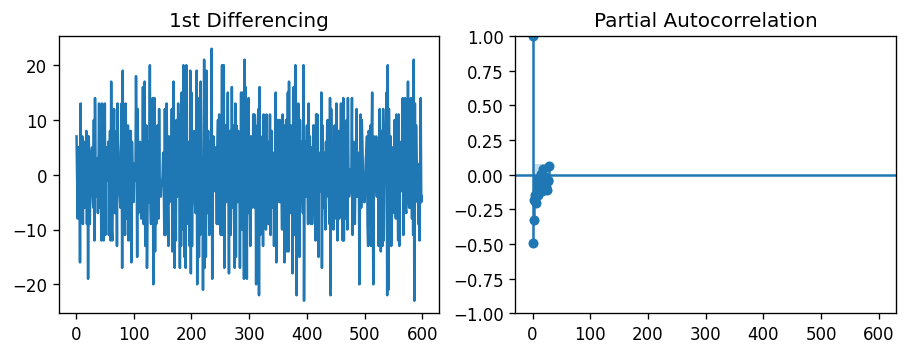

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.QuantityDelivered.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.QuantityDelivered.diff().dropna(), ax=axes[1])

plt.show() 

##**find the order of the MA term (q)**

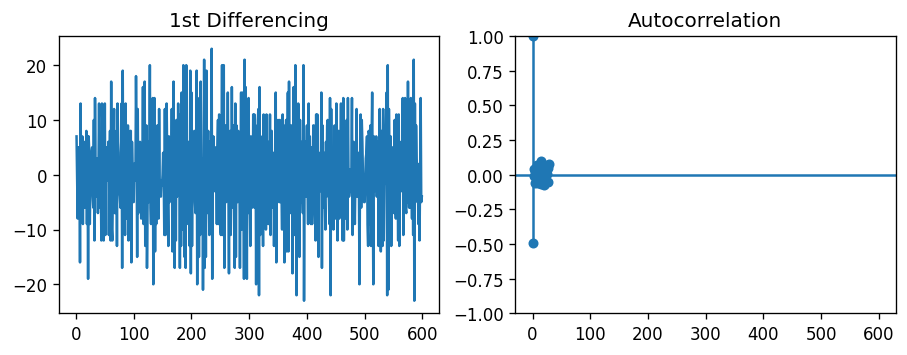

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.QuantityDelivered.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.QuantityDelivered.diff().dropna(), ax=axes[1])

plt.show() 

##**ARIMA MODEL BUILDING**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.QuantityDelivered, order=(1,1,2)) ## p,d,q
model_fit = model.fit()
print(model_fit.summary()) 

                               SARIMAX Results                                
Dep. Variable:      QuantityDelivered   No. Observations:                  600
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2016.112
Date:                Tue, 02 May 2023   AIC                           4040.225
Time:                        12:13:20   BIC                           4057.806
Sample:                             0   HQIC                          4047.069
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9392      0.039    -24.306      0.000      -1.015      -0.863
ma.L1         -0.0283      0.051     -0.560      0.576      -0.127       0.071
ma.L2         -0.9705      0.044    -21.863      0.0

In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(data.QuantityDelivered, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary()) 

                               SARIMAX Results                                
Dep. Variable:      QuantityDelivered   No. Observations:                  600
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2017.566
Date:                Tue, 02 May 2023   AIC                           4041.132
Time:                        12:13:20   BIC                           4054.318
Sample:                             0   HQIC                          4046.265
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.041      1.449      0.147      -0.021       0.140
ma.L1         -0.9999      0.441     -2.266      0.023      -1.865      -0.135
sigma2        48.8190     21.888      2.230      0.0

##**Ploting Residual Errors**

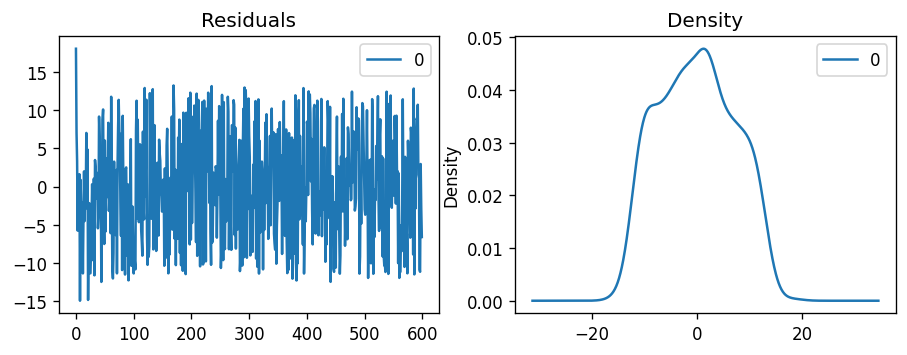

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]) 
plt.show() 

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.QuantityDelivered[:6]
test = data.QuantityDelivered[6:] 

In [ ]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast 
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index) 
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100) 
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)  
plt.show()     